In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("samples_v2.csv")
df = df[df["tricks_left"] == 7]

In [17]:
X = df.drop(columns=["true_score", "home_num_9", "home_num_8", "home_num_7", "away_num_9", "away_num_8", "away_num_7", "score_diff"])
y = df["true_score"]

In [18]:
X.head()

,tricks_left,is_home_turn,home_num_A,home_num_10,home_num_K,home_num_Q,home_num_J,away_num_A,away_num_10,away_num_K,away_num_Q,away_num_J
30,7,0,3,1,1,1,1,1,2,2,3,3
35,7,0,3,1,2,1,1,1,2,2,3,3
36,7,1,3,1,2,1,0,1,3,2,3,3
37,7,1,3,1,2,0,0,1,3,2,3,3
38,7,1,2,1,1,1,1,1,2,2,3,3


In [19]:
df.groupby("is_home_turn")["true_score"].describe()

,count,mean,std,min,25%,50%,75%,max
is_home_turn,,,,,,,,
0,2540.0,62.684252,27.370482,4.0,43.0,62.0,81.0,128.0
1,3762.0,67.076023,26.237884,2.0,48.0,69.0,86.0,126.0


<Axes: >

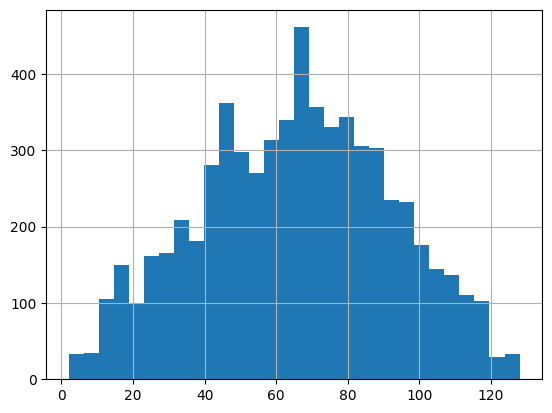

In [20]:
df["true_score"].hist(bins=30)

In [21]:
corr = df.corr(numeric_only=True)["true_score"].sort_values()
corr

away_num_A     -0.706821
home_num_9     -0.166171
home_num_7     -0.156790
home_num_Q     -0.149103
home_num_8     -0.134366
home_num_J     -0.121194
away_num_10    -0.076529
home_num_K     -0.074694
away_num_K      0.080136
is_home_turn    0.080433
home_num_10     0.084831
away_num_8      0.117703
score_diff      0.131248
away_num_J      0.131351
away_num_Q      0.136561
away_num_7      0.150419
away_num_9      0.170297
home_num_A      0.736104
true_score      1.000000
tricks_left          NaN
Name: true_score, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.intercept_)
pd.Series(lr.coef_, index=X.columns).sort_values()

65.2118221511572


away_num_A     -15.474472
away_num_10     -6.134618
away_num_K      -2.074573
home_num_J      -0.555817
away_num_J      -0.090531
away_num_Q      -0.076888
tricks_left      0.000000
home_num_Q       0.107745
home_num_K       1.269633
home_num_10      3.970102
home_num_A      13.895294
is_home_turn    22.319985
dtype: float64

In [24]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 9.556456728671318
